In [1]:
ls

In [2]:
import pandas as pd
import numpy as np
import pickle
import plotly.express as px

In [3]:
# load data
df = pd.read_csv("blocks.csv")
df2 = pd.read_csv("transactions.csv")

In [4]:
df.head()

,block_timestamp,base_fee_per_gas
0,2021-11-26 21:32:09,116925004757
1,2021-11-26 21:31:58,121935382610
2,2021-11-26 21:31:38,108389042873
3,2021-11-26 21:31:36,123043231276
4,2021-11-26 21:31:28,118132043184


In [5]:
len(df)

250

In [6]:
len(pd.Series(df['block_timestamp']).unique())

250

In [7]:
df2.head()

,block_timestamp,max_priority_fee_per_gas,receipt_effective_gas_price
0,2021-11-26 21:32:09,1500000000,118425004757
1,2021-11-26 21:32:09,1500000000,118425004757
2,2021-11-26 21:32:09,0,146226026691
3,2021-11-26 21:32:09,1500000000,118425004757
4,2021-11-26 21:32:09,1500000000,118425004757


## agg

In [8]:
df2_agg = df2[['block_timestamp', 'receipt_effective_gas_price', 'max_priority_fee_per_gas']].groupby('block_timestamp').agg(['mean', 'count'])
df2_agg.columns = df2_agg.columns.map('_'.join).str.strip('_')
df2_agg.tail()


,receipt_effective_gas_price_mean,receipt_effective_gas_price_count,max_priority_fee_per_gas_mean,max_priority_fee_per_gas_count
block_timestamp,,,,
2021-11-26 21:31:28,1.294033e+11,244,2.694314e+09,244
2021-11-26 21:31:36,1.428499e+11,15,1.029843e+09,15
2021-11-26 21:31:38,1.153387e+11,802,1.903706e+09,802
2021-11-26 21:31:58,1.340119e+11,129,3.603926e+09,129
2021-11-26 21:32:09,1.263216e+11,110,3.447819e+09,110


In [9]:
#df2_agg = pd.DataFrame(df2_agg).sort_values(by=['block_timestamp'], ascending=False)

In [10]:
len(df2_agg)

456

In [11]:
len(df)

250

## merge

In [12]:
df_merge=df.merge(right=df2_agg, how='inner', on='block_timestamp')
df_merge = pd.DataFrame(df_merge).sort_values(by='block_timestamp', ascending=True)

In [13]:
df_merge = df_merge[-200:]

In [14]:
df_merge.head()

,block_timestamp,base_fee_per_gas,receipt_effective_gas_price_mean,receipt_effective_gas_price_count,max_priority_fee_per_gas_mean,max_priority_fee_per_gas_count
199,2021-11-26 20:43:21,110903003866,1.206594e+11,182,6.713488e+09,182
198,2021-11-26 20:43:32,109703066909,1.192347e+11,365,5.109684e+09,365
197,2021-11-26 20:43:59,119082739876,1.331113e+11,82,6.941974e+09,82
196,2021-11-26 20:44:14,110363158120,1.139610e+11,94,2.487415e+09,94
195,2021-11-26 20:44:20,103271235375,1.284469e+11,481,1.239531e+10,481


In [15]:
len(df_merge)

200

In [16]:
cols = ['base_fee_per_gas', 'receipt_effective_gas_price_count', 'receipt_effective_gas_price_mean', 'max_priority_fee_per_gas_mean']
for col in cols:
    # Last 5 blocks
    df_merge[col+'_pct_chg_last_5'] = df_merge[col]/df_merge[col].shift(5)-1
    # 100 blocks ago to 5 blocks ago percentage changes
    df_merge[col+'_pct_chg_last_100_to_5'] = df_merge[col].shift(5)/df_merge[col].shift(100)-1


In [17]:
#df_merge = pd.DataFrame(df_merge).sort_values(by='block_timestamp', ascending=False)

In [18]:
df_merge = df_merge[-100:]
df_merge.head()

,block_timestamp,base_fee_per_gas,receipt_effective_gas_price_mean,receipt_effective_gas_price_count,max_priority_fee_per_gas_mean,max_priority_fee_per_gas_count,base_fee_per_gas_pct_chg_last_5,base_fee_per_gas_pct_chg_last_100_to_5,receipt_effective_gas_price_count_pct_chg_last_5,receipt_effective_gas_price_count_pct_chg_last_100_to_5,receipt_effective_gas_price_mean_pct_chg_last_5,receipt_effective_gas_price_mean_pct_chg_last_100_to_5,max_priority_fee_per_gas_mean_pct_chg_last_5,max_priority_fee_per_gas_mean_pct_chg_last_100_to_5
99,2021-11-26 21:06:20,91046422373,1.036508e+11,132,6.109537e+09,132,-0.089300,-0.098545,2.882353,-0.813187,-0.185910,0.055211,-0.176802,0.105492
98,2021-11-26 21:06:21,86260039413,9.510616e+10,28,5.307830e+09,28,-0.032590,-0.187207,-0.754386,-0.687671,-0.042633,-0.166841,0.194273,-0.130200
97,2021-11-26 21:06:24,76936748172,8.872171e+10,137,1.187922e+10,137,-0.076861,-0.300129,-0.055172,0.768293,-0.055456,-0.294344,-0.389829,1.804487
96,2021-11-26 21:06:26,76271728244,9.257116e+10,37,2.372952e+09,37,-0.099303,-0.232708,-0.912941,3.521277,-0.100077,-0.097361,-0.548661,1.113672
95,2021-11-26 21:06:29,69128885183,9.036085e+10,220,1.092610e+10,220,-0.267777,-0.085809,0.679389,-0.727651,-0.079476,-0.235774,2.867008,-0.772054


In [19]:
df_merge.tail()

,block_timestamp,base_fee_per_gas,receipt_effective_gas_price_mean,receipt_effective_gas_price_count,max_priority_fee_per_gas_mean,max_priority_fee_per_gas_count,base_fee_per_gas_pct_chg_last_5,base_fee_per_gas_pct_chg_last_100_to_5,receipt_effective_gas_price_count_pct_chg_last_5,receipt_effective_gas_price_count_pct_chg_last_100_to_5,receipt_effective_gas_price_mean_pct_chg_last_5,receipt_effective_gas_price_mean_pct_chg_last_100_to_5,max_priority_fee_per_gas_mean_pct_chg_last_5,max_priority_fee_per_gas_mean_pct_chg_last_100_to_5
4,2021-11-26 21:31:28,118132043184,1.294033e+11,244,2.694314e+09,244,0.060706,0.114000,2.128205,1.294118,0.046382,-0.028697,-0.768591,0.568788
3,2021-11-26 21:31:36,123043231276,1.428499e+11,15,1.029843e+09,15,0.192884,0.156806,-0.987013,9.131579,0.240892,0.158819,-0.677249,-0.282056
2,2021-11-26 21:31:38,108389042873,1.153387e+11,802,1.903706e+09,802,-0.062864,0.387766,6.290909,-0.241379,-0.049712,0.292147,-0.128960,-0.887740
1,2021-11-26 21:31:58,121935382610,1.340119e+11,129,3.603926e+09,129,0.095058,0.314946,0.277228,-0.762353,0.011139,0.288434,0.146403,-0.402066
0,2021-11-26 21:32:09,116925004757,1.263216e+11,110,3.447819e+09,110,0.113405,0.112341,-0.905579,7.893130,0.115994,0.153110,5.261266,-0.805109


In [20]:
len(df_merge)

100

## seasonality

In [21]:
df_merge.head()

,block_timestamp,base_fee_per_gas,receipt_effective_gas_price_mean,receipt_effective_gas_price_count,max_priority_fee_per_gas_mean,max_priority_fee_per_gas_count,base_fee_per_gas_pct_chg_last_5,base_fee_per_gas_pct_chg_last_100_to_5,receipt_effective_gas_price_count_pct_chg_last_5,receipt_effective_gas_price_count_pct_chg_last_100_to_5,receipt_effective_gas_price_mean_pct_chg_last_5,receipt_effective_gas_price_mean_pct_chg_last_100_to_5,max_priority_fee_per_gas_mean_pct_chg_last_5,max_priority_fee_per_gas_mean_pct_chg_last_100_to_5
99,2021-11-26 21:06:20,91046422373,1.036508e+11,132,6.109537e+09,132,-0.089300,-0.098545,2.882353,-0.813187,-0.185910,0.055211,-0.176802,0.105492
98,2021-11-26 21:06:21,86260039413,9.510616e+10,28,5.307830e+09,28,-0.032590,-0.187207,-0.754386,-0.687671,-0.042633,-0.166841,0.194273,-0.130200
97,2021-11-26 21:06:24,76936748172,8.872171e+10,137,1.187922e+10,137,-0.076861,-0.300129,-0.055172,0.768293,-0.055456,-0.294344,-0.389829,1.804487
96,2021-11-26 21:06:26,76271728244,9.257116e+10,37,2.372952e+09,37,-0.099303,-0.232708,-0.912941,3.521277,-0.100077,-0.097361,-0.548661,1.113672
95,2021-11-26 21:06:29,69128885183,9.036085e+10,220,1.092610e+10,220,-0.267777,-0.085809,0.679389,-0.727651,-0.079476,-0.235774,2.867008,-0.772054


In [22]:
df_merge['local_date'] = pd.to_datetime(df_merge['block_timestamp']).dt.tz_localize('utc').dt.tz_convert('US/Eastern')
df_merge['date'] = df_merge['local_date'].dt.date
df_merge['hour'] = df_merge['local_date'].dt.hour
df_merge['minute'] = df_merge['local_date'].dt.minute
df_merge['weekday'] = df_merge['local_date'].dt.weekday
df_merge.head()

,block_timestamp,base_fee_per_gas,receipt_effective_gas_price_mean,receipt_effective_gas_price_count,max_priority_fee_per_gas_mean,max_priority_fee_per_gas_count,base_fee_per_gas_pct_chg_last_5,base_fee_per_gas_pct_chg_last_100_to_5,receipt_effective_gas_price_count_pct_chg_last_5,receipt_effective_gas_price_count_pct_chg_last_100_to_5,receipt_effective_gas_price_mean_pct_chg_last_5,receipt_effective_gas_price_mean_pct_chg_last_100_to_5,max_priority_fee_per_gas_mean_pct_chg_last_5,max_priority_fee_per_gas_mean_pct_chg_last_100_to_5,local_date,date,hour,minute,weekday
99,2021-11-26 21:06:20,91046422373,1.036508e+11,132,6.109537e+09,132,-0.089300,-0.098545,2.882353,-0.813187,-0.185910,0.055211,-0.176802,0.105492,2021-11-26 16:06:20-05:00,2021-11-26,16,6,4
98,2021-11-26 21:06:21,86260039413,9.510616e+10,28,5.307830e+09,28,-0.032590,-0.187207,-0.754386,-0.687671,-0.042633,-0.166841,0.194273,-0.130200,2021-11-26 16:06:21-05:00,2021-11-26,16,6,4
97,2021-11-26 21:06:24,76936748172,8.872171e+10,137,1.187922e+10,137,-0.076861,-0.300129,-0.055172,0.768293,-0.055456,-0.294344,-0.389829,1.804487,2021-11-26 16:06:24-05:00,2021-11-26,16,6,4
96,2021-11-26 21:06:26,76271728244,9.257116e+10,37,2.372952e+09,37,-0.099303,-0.232708,-0.912941,3.521277,-0.100077,-0.097361,-0.548661,1.113672,2021-11-26 16:06:26-05:00,2021-11-26,16,6,4
95,2021-11-26 21:06:29,69128885183,9.036085e+10,220,1.092610e+10,220,-0.267777,-0.085809,0.679389,-0.727651,-0.079476,-0.235774,2.867008,-0.772054,2021-11-26 16:06:29-05:00,2021-11-26,16,6,4


In [23]:
df_merge['hour_dummy'] = 0
start_hour = 2
end_hour = 9
mask = (df_merge['hour'] < start_hour) | (df_merge['hour'] > end_hour)
df_merge.loc[mask, 'hour_dummy'] = 1

df_merge['minute_dummy'] = 0
start_minute = 1
end_minute = 6
mask = (df_merge['minute'] >= start_minute) & (df_merge['minute'] <= end_minute)
df_merge.loc[mask, 'minute_dummy'] = 1

df_merge['weekday_dummy'] = 0
start_weekday = 1
end_weekday = 4
mask = (df_merge['weekday'] >= start_weekday) & (df_merge['weekday'] <= end_weekday)
df_merge.loc[mask, 'weekday_dummy'] = 1

In [24]:
df_merge.head()

,block_timestamp,base_fee_per_gas,receipt_effective_gas_price_mean,receipt_effective_gas_price_count,max_priority_fee_per_gas_mean,max_priority_fee_per_gas_count,base_fee_per_gas_pct_chg_last_5,base_fee_per_gas_pct_chg_last_100_to_5,receipt_effective_gas_price_count_pct_chg_last_5,receipt_effective_gas_price_count_pct_chg_last_100_to_5,...,max_priority_fee_per_gas_mean_pct_chg_last_5,max_priority_fee_per_gas_mean_pct_chg_last_100_to_5,local_date,date,hour,minute,weekday,hour_dummy,minute_dummy,weekday_dummy
99,2021-11-26 21:06:20,91046422373,1.036508e+11,132,6.109537e+09,132,-0.089300,-0.098545,2.882353,-0.813187,...,-0.176802,0.105492,2021-11-26 16:06:20-05:00,2021-11-26,16,6,4,1,1,1
98,2021-11-26 21:06:21,86260039413,9.510616e+10,28,5.307830e+09,28,-0.032590,-0.187207,-0.754386,-0.687671,...,0.194273,-0.130200,2021-11-26 16:06:21-05:00,2021-11-26,16,6,4,1,1,1
97,2021-11-26 21:06:24,76936748172,8.872171e+10,137,1.187922e+10,137,-0.076861,-0.300129,-0.055172,0.768293,...,-0.389829,1.804487,2021-11-26 16:06:24-05:00,2021-11-26,16,6,4,1,1,1
96,2021-11-26 21:06:26,76271728244,9.257116e+10,37,2.372952e+09,37,-0.099303,-0.232708,-0.912941,3.521277,...,-0.548661,1.113672,2021-11-26 16:06:26-05:00,2021-11-26,16,6,4,1,1,1
95,2021-11-26 21:06:29,69128885183,9.036085e+10,220,1.092610e+10,220,-0.267777,-0.085809,0.679389,-0.727651,...,2.867008,-0.772054,2021-11-26 16:06:29-05:00,2021-11-26,16,6,4,1,1,1


In [25]:
df_merge.columns

Index(['block_timestamp', 'base_fee_per_gas',
       'receipt_effective_gas_price_mean', 'receipt_effective_gas_price_count',
       'max_priority_fee_per_gas_mean', 'max_priority_fee_per_gas_count',
       'base_fee_per_gas_pct_chg_last_5',
       'base_fee_per_gas_pct_chg_last_100_to_5',
       'receipt_effective_gas_price_count_pct_chg_last_5',
       'receipt_effective_gas_price_count_pct_chg_last_100_to_5',
       'receipt_effective_gas_price_mean_pct_chg_last_5',
       'receipt_effective_gas_price_mean_pct_chg_last_100_to_5',
       'max_priority_fee_per_gas_mean_pct_chg_last_5',
       'max_priority_fee_per_gas_mean_pct_chg_last_100_to_5', 'local_date',
       'date', 'hour', 'minute', 'weekday', 'hour_dummy', 'minute_dummy',
       'weekday_dummy'],
      dtype='object')

##### FROM ROB: 
'''rf_features = ['base_fee_per_gas_pct_chg_last_100_to_5', 'base_fee_per_gas_pct_chg_last_5',
             'number_transactions_in_block_pct_chg_last_100_to_5', 'number_transactions_in_block_pct_chg_last_5',
             'effective_gas_price_mean_pct_chg_last_100_to_5', 'effective_gas_price_mean_pct_chg_last_5',
             'max_priority_fee_per_gas_mean_pct_chg_last_100_to_5', 'max_priority_fee_per_gas_mean_pct_chg_last_5',
             'minute_dummy', 'hour_dummy', 'weekday_dummy']
'''

In [26]:
df_merge.rename(columns={
       'receipt_effective_gas_price_count_pct_chg_last_5':'number_transactions_in_block_pct_chg_last_5',
       'receipt_effective_gas_price_count_pct_chg_last_100_to_5':'number_transactions_in_block_pct_chg_last_100_to_5',
       'receipt_effective_gas_price_mean_pct_chg_last_5':'effective_gas_price_mean_pct_chg_last_5',
       'receipt_effective_gas_price_mean_pct_chg_last_100_to_5':'effective_gas_price_mean_pct_chg_last_100_to_5',
        }, inplace=True)


In [27]:
df_merge.columns

Index(['block_timestamp', 'base_fee_per_gas',
       'receipt_effective_gas_price_mean', 'receipt_effective_gas_price_count',
       'max_priority_fee_per_gas_mean', 'max_priority_fee_per_gas_count',
       'base_fee_per_gas_pct_chg_last_5',
       'base_fee_per_gas_pct_chg_last_100_to_5',
       'number_transactions_in_block_pct_chg_last_5',
       'number_transactions_in_block_pct_chg_last_100_to_5',
       'effective_gas_price_mean_pct_chg_last_5',
       'effective_gas_price_mean_pct_chg_last_100_to_5',
       'max_priority_fee_per_gas_mean_pct_chg_last_5',
       'max_priority_fee_per_gas_mean_pct_chg_last_100_to_5', 'local_date',
       'date', 'hour', 'minute', 'weekday', 'hour_dummy', 'minute_dummy',
       'weekday_dummy'],
      dtype='object')

In [28]:
with open('rf_test_model.pkl', 'rb') as model:
    rf = pickle.load(model)

/Users/anthonybaldor/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Users/anthonybaldor/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.24.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [29]:
features = ['base_fee_per_gas_pct_chg_last_100_to_5', 
            'base_fee_per_gas_pct_chg_last_5',
            'number_transactions_in_block_pct_chg_last_100_to_5', 
            'number_transactions_in_block_pct_chg_last_5',
            'effective_gas_price_mean_pct_chg_last_100_to_5', 
            'effective_gas_price_mean_pct_chg_last_5',
            'max_priority_fee_per_gas_mean_pct_chg_last_100_to_5', 
            'max_priority_fee_per_gas_mean_pct_chg_last_5',
            'minute_dummy', 'hour_dummy', 'weekday_dummy']
df_predict = df_merge[features]



'''df_predict = df_merge[features].astype({
    'base_fee_per_gas_pct_chg_last_100_to_5': np.float32,
    'base_fee_per_gas_pct_chg_last_5': np.float32,
    'receipt_effective_gas_price_count_pct_chg_last_100_to_5': np.float32,
    'receipt_effective_gas_price_count_pct_chg_last_5': np.float32,
    'receipt_effective_gas_price_mean_pct_chg_last_100_to_5': np.float32,
    'receipt_effective_gas_price_mean_pct_chg_last_5': np.float32,
    'max_priority_fee_per_gas_mean_pct_chg_last_100_to_5': np.float32,
    'max_priority_fee_per_gas_mean_pct_chg_last_5': np.float32,
})
'''

In [30]:
df_predict.tail()

,base_fee_per_gas_pct_chg_last_100_to_5,base_fee_per_gas_pct_chg_last_5,number_transactions_in_block_pct_chg_last_100_to_5,number_transactions_in_block_pct_chg_last_5,effective_gas_price_mean_pct_chg_last_100_to_5,effective_gas_price_mean_pct_chg_last_5,max_priority_fee_per_gas_mean_pct_chg_last_100_to_5,max_priority_fee_per_gas_mean_pct_chg_last_5,minute_dummy,hour_dummy,weekday_dummy
4,0.114000,0.060706,1.294118,2.128205,-0.028697,0.046382,0.568788,-0.768591,0,1,1
3,0.156806,0.192884,9.131579,-0.987013,0.158819,0.240892,-0.282056,-0.677249,0,1,1
2,0.387766,-0.062864,-0.241379,6.290909,0.292147,-0.049712,-0.887740,-0.128960,0,1,1
1,0.314946,0.095058,-0.762353,0.277228,0.288434,0.011139,-0.402066,0.146403,0,1,1
0,0.112341,0.113405,7.893130,-0.905579,0.153110,0.115994,-0.805109,5.261266,0,1,1


In [31]:
mask100 = (df_predict['max_priority_fee_per_gas_mean_pct_chg_last_100_to_5'] >= 17.677177)
df_predict.loc[mask100, 'max_priority_fee_per_gas_mean_pct_chg_last_100_to_5'] = 17.677177
mask5 = (df_predict['max_priority_fee_per_gas_mean_pct_chg_last_5'] >= 10.24462)
df_predict.loc[mask5, 'max_priority_fee_per_gas_mean_pct_chg_last_5'] = 10.24462

/Users/anthonybaldor/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [32]:
#columns = df_predict.columns
#values = [0.431637, 0.309303, 8.809524, 8.9, 17.677177, 16.710033, 15.495496, 10.24462]
#for i in columns[:8]:
#    df_predict[i].replace(np.inf, values[columns.get_loc(i)], inplace=True)
#    #print(values[columns.get_loc(i)])
#    #print(df_predict[i])


In [33]:
predicted = rf.predict(df_predict)

In [34]:
print(predicted)

[9.07685796e+10 9.11981415e+10 9.11981415e+10 9.09638347e+10
 9.11981415e+10 9.11981415e+10 9.11981415e+10 1.00633421e+11
 9.66121462e+10 9.74815224e+10 9.37431989e+10 9.92520586e+10
 9.20993912e+10 9.75696625e+10 9.68482336e+10 9.64500544e+10
 9.97788517e+10 1.33006781e+11 9.48761513e+10 9.78322414e+10
 1.12941480e+11 1.03065643e+11 9.62883856e+10 1.00002784e+11
 1.18357863e+11 1.19857996e+11 1.06849770e+11 9.91725363e+10
 1.28808231e+11 1.40935709e+11 1.10126221e+11 1.03568754e+11
 9.13393740e+10 9.59849501e+10 9.55383249e+10 9.68482336e+10
 9.98415933e+10 9.31437044e+10 1.05035740e+11 9.16040736e+10
 9.30572789e+10 9.50037457e+10 9.11981415e+10 9.21107553e+10
 1.01454522e+11 9.13311788e+10 9.84842399e+10 9.45710521e+10
 9.41952572e+10 9.14628411e+10 9.31437044e+10 9.42339191e+10
 1.02476255e+11 9.28543045e+10 9.91227222e+10 9.22427829e+10
 9.90261389e+10 9.51448884e+10 9.75941179e+10 9.13393740e+10
 9.48761513e+10 9.23942958e+10 9.42201852e+10 9.79618308e+10
 9.11981415e+10 9.076857

In [35]:
print(len(predicted))
print(len(df_merge))

100
100


In [36]:
chart = df_merge[['block_timestamp','receipt_effective_gas_price_mean']]

In [37]:
chart['predicted'] = predicted

<ipython-input-37-845f1b7af06c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chart['predicted'] = predicted


In [38]:
chart.head()

,block_timestamp,receipt_effective_gas_price_mean,predicted
99,2021-11-26 21:06:20,1.036508e+11,9.076858e+10
98,2021-11-26 21:06:21,9.510616e+10,9.119814e+10
97,2021-11-26 21:06:24,8.872171e+10,9.119814e+10
96,2021-11-26 21:06:26,9.257116e+10,9.096383e+10
95,2021-11-26 21:06:29,9.036085e+10,9.119814e+10


In [39]:
chart.tail()

,block_timestamp,receipt_effective_gas_price_mean,predicted
4,2021-11-26 21:31:28,1.294033e+11,9.487615e+10
3,2021-11-26 21:31:36,1.428499e+11,9.787755e+10
2,2021-11-26 21:31:38,1.153387e+11,1.003649e+11
1,2021-11-26 21:31:58,1.340119e+11,9.549536e+10
0,2021-11-26 21:32:09,1.263216e+11,9.634531e+10


In [40]:
chart.set_index('block_timestamp')

,receipt_effective_gas_price_mean,predicted
block_timestamp,,
2021-11-26 21:06:20,1.036508e+11,9.076858e+10
2021-11-26 21:06:21,9.510616e+10,9.119814e+10
2021-11-26 21:06:24,8.872171e+10,9.119814e+10
2021-11-26 21:06:26,9.257116e+10,9.096383e+10
2021-11-26 21:06:29,9.036085e+10,9.119814e+10
...,...,...
2021-11-26 21:31:28,1.294033e+11,9.487615e+10
2021-11-26 21:31:36,1.428499e+11,9.787755e+10
2021-11-26 21:31:38,1.153387e+11,1.003649e+11


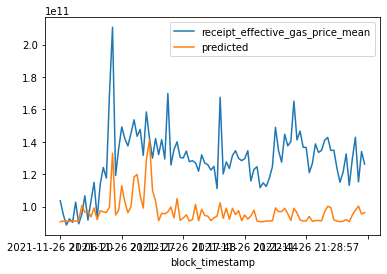

In [41]:
chart.set_index('block_timestamp').plot()

In [42]:
chart.to_csv('chart.csv', index=False)
